In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/df_final_provincial.csv')
df

,fecha,provincia,ccs_promedio_provincial,ufc_promedio_provincial
0,2014-01-01,Buenos Aires,447,109
1,2014-02-01,Buenos Aires,483,121
2,2014-03-01,Buenos Aires,476,115
3,2014-04-01,Buenos Aires,467,117
4,2014-05-01,Buenos Aires,467,90
...,...,...,...,...
379,2018-12-01,Santiago del Estero,401,90
380,2019-01-01,Santiago del Estero,456,129
381,2019-02-01,Santiago del Estero,509,82
382,2019-03-01,Santiago del Estero,445,62


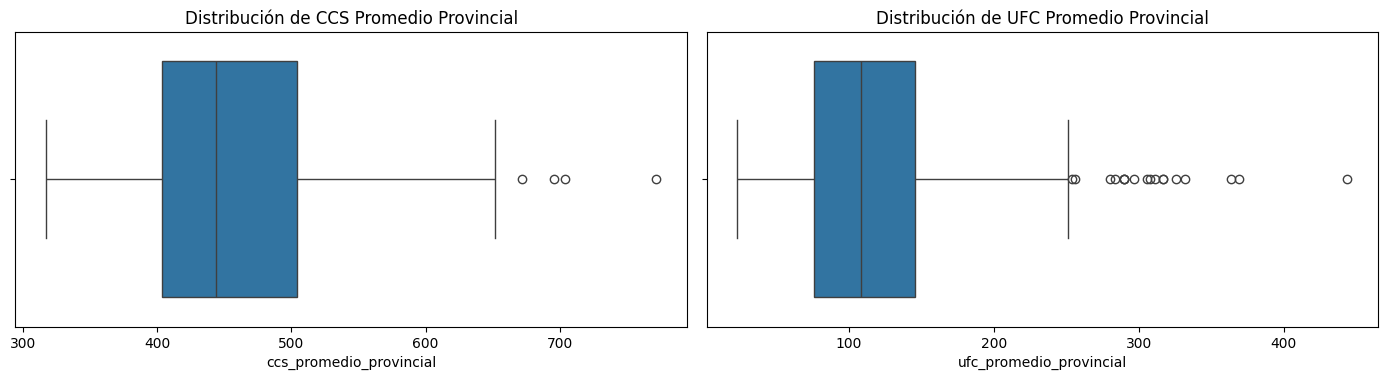

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el boxplot
plt.figure(figsize=(14, 7))

# Boxplot para ccs_promedio_provincial
plt.subplot(2, 2, 3)
sns.boxplot(x='ccs_promedio_provincial', data=df)
plt.title('Distribución de CCS Promedio Provincial')

# Boxplot para ufc_promedio_provincial
plt.subplot(2, 2, 4)
sns.boxplot(x='ufc_promedio_provincial', data=df)
plt.title('Distribución de UFC Promedio Provincial')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

###VALORES MAYORES A 250 EN UFC, SON VALORES OUTLIERS

In [ ]:
# Filtrar los datos donde ufc_promedio_provincial es mayor a 250
filtered_df = df[df['ufc_promedio_provincial'] > 250]

# Mostrar las primeras filas del DataFrame filtrado para verificar
filtered_df

,fecha,provincia,ccs_promedio_provincial,ufc_promedio_provincial
100,2015-01-01,Entre Ríos,598,290
128,2017-05-01,Entre Ríos,502,256
182,2014-04-01,Santa Fe,574,251
200,2015-01-01,Santa Fe,504,308
203,2015-04-01,Santa Fe,518,254
204,2015-05-01,Santa Fe,486,306
207,2015-08-01,Santa Fe,429,290
210,2015-11-01,Santa Fe,438,280
211,2015-12-01,Santa Fe,470,311
212,2016-01-01,Santa Fe,548,297


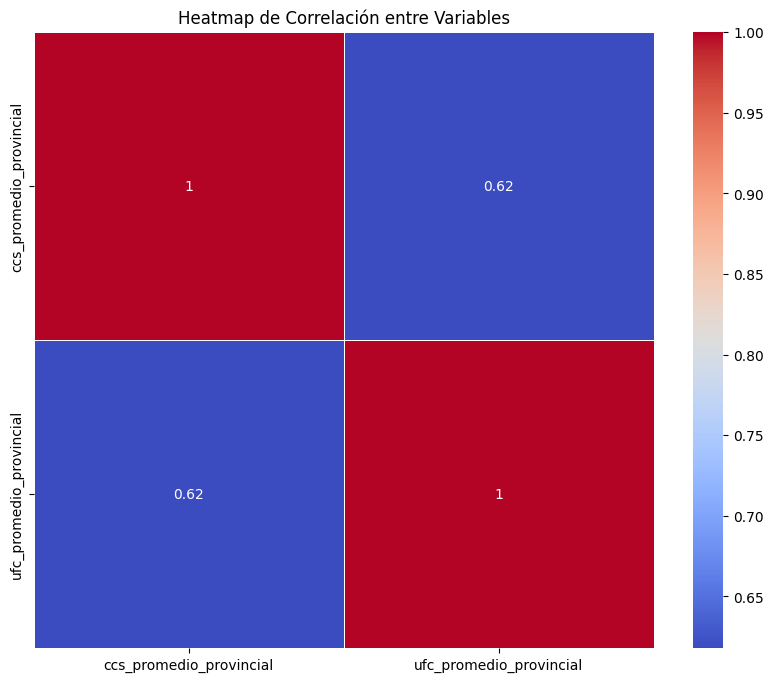

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df[['ccs_promedio_provincial', 'ufc_promedio_provincial']].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación entre Variables')
plt.show()

In [ ]:
# Creamos el grafico de dispersion ufc y ccs
df.plot(kind='scatter', x='ccs_promedio_provincial', y='ufc_promedio_provincial', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Convertir la fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Descomponer la fecha en año y mes
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Codificar la columna 'provincia' como números usando LabelEncoder
le = LabelEncoder()
df['provincia_encoded'] = le.fit_transform(df['provincia'])

In [ ]:
df.head()

,fecha,provincia,ccs_promedio_provincial,ufc_promedio_provincial,año,mes,provincia_encoded
0,2014-01-01,Buenos Aires,447,109,2014,1,0
1,2014-02-01,Buenos Aires,483,121,2014,2,0
2,2014-03-01,Buenos Aires,476,115,2014,3,0
3,2014-04-01,Buenos Aires,467,117,2014,4,0
4,2014-05-01,Buenos Aires,467,90,2014,5,0


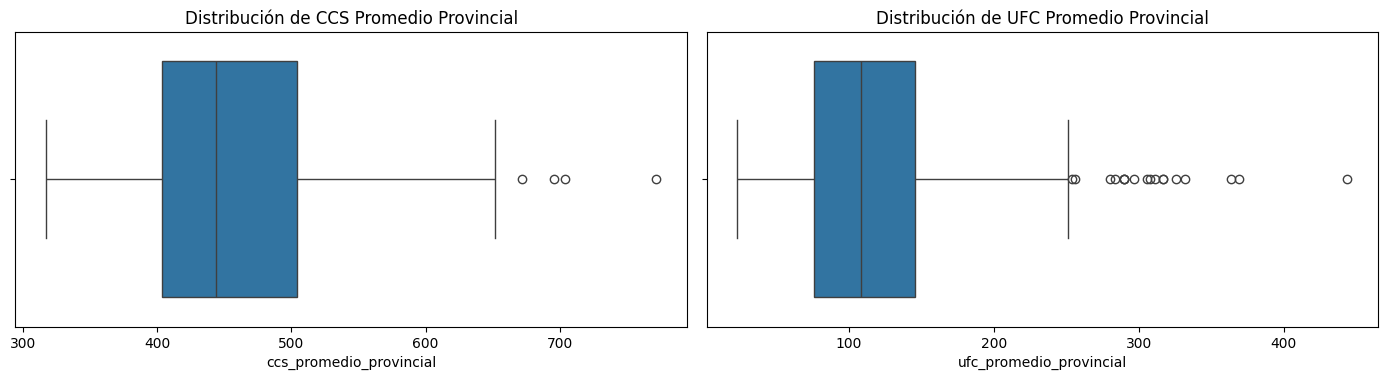

In [ ]:
# Crear el boxplot
plt.figure(figsize=(14, 7))

# Boxplot para ccs_promedio_provincial
plt.subplot(2, 2, 3)
sns.boxplot(x='ccs_promedio_provincial', data=df)
plt.title('Distribución de CCS Promedio Provincial')

# Boxplot para ufc_promedio_provincial
plt.subplot(2, 2, 4)
sns.boxplot(x='ufc_promedio_provincial', data=df)
plt.title('Distribución de UFC Promedio Provincial')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Calcular la media de la columna 'ufc_promedio_provincial'
mean_ufc_provincial = df['ufc_promedio_provincial'].mean()

# Aplicar la condición y reemplazar los valores mayores a 250
df.loc[df['ufc_promedio_provincial'] > 260, 'ufc_promedio_provincial'] = mean_ufc_provincial

# Calcular la media de la columna 'ufc_promedio_provincial'
mean_ccs_provincial = df['ccs_promedio_provincial'].mean()

# Aplicar la condición y reemplazar los valores mayores a 250
df.loc[df['ccs_promedio_provincial'] > 700, 'ccs_promedio_provincial'] = mean_ccs_provincial

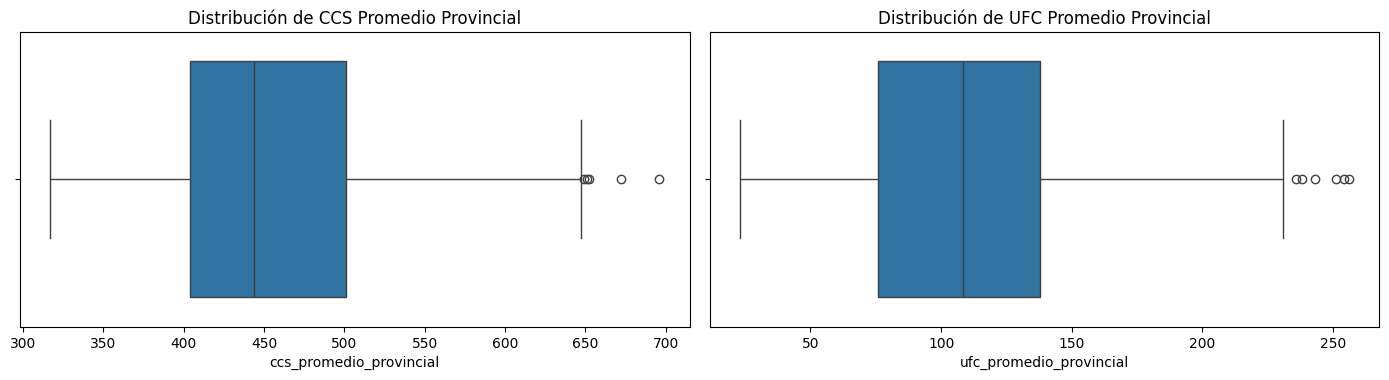

In [ ]:
# Crear el boxplot
plt.figure(figsize=(14, 7))

# Boxplot para ccs_promedio_provincial
plt.subplot(2, 2, 3)
sns.boxplot(x='ccs_promedio_provincial', data=df)
plt.title('Distribución de CCS Promedio Provincial')

# Boxplot para ufc_promedio_provincial
plt.subplot(2, 2, 4)
sns.boxplot(x='ufc_promedio_provincial', data=df)
plt.title('Distribución de UFC Promedio Provincial')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las características (features) y la variable objetivo (target)
X = df[['ufc_promedio_provincial', 'año', 'mes', 'provincia_encoded']]
y = df['ccs_promedio_provincial']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3290.064498584657
R-squared: 0.41259324631076466
